In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


## Dataframe 

In [4]:
# Load the Excel file
df = pd.read_excel('balanced_diverse_wellbeing_dataset.xlsx')

# Display basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2000, 12)


,Age Group,Gender,Daily Routine,Mood,Stress Frequency,Life Satisfaction,Work Feeling,Study Feeling,Social Life,Social Media Effect,Lifestyle Supportive,Willingness to Change
0,36-50,Other,Very Busy,Neutral,Almost Daily,Neutral,Motivated,Bored,Very Social,Anxious,No,Very Unlikely
1,36-50,Female,Very Busy,Negative,Occasionally,Satisfied,Bored,Bored,Very Social,Inspired,Somewhat,Very Unlikely
2,18-25,Female,Relaxed,Positive,Occasionally,Neutral,Not Applicable,Motivated,Very Social,Anxious,Yes,Very Unlikely
3,18-25,Male,Very Busy,Negative,Daily,Dissatisfied,Bored,Motivated,Neutral,Anxious,Somewhat,Very Likely
4,50+,Female,Somewhat Busy,Positive,Never,Satisfied,Motivated,Not Applicable,Very Social,Anxious,Yes,Very Likely


## Checking for duplicate values

In [5]:
# Summary
df.info()

# Check for nulls
print("\nMissing Values:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age Group              2000 non-null   object
 1   Gender                 2000 non-null   object
 2   Daily Routine          2000 non-null   object
 3   Mood                   2000 non-null   object
 4   Stress Frequency       2000 non-null   object
 5   Life Satisfaction      2000 non-null   object
 6   Work Feeling           2000 non-null   object
 7   Study Feeling          2000 non-null   object
 8   Social Life            2000 non-null   object
 9   Social Media Effect    2000 non-null   object
 10  Lifestyle Supportive   2000 non-null   object
 11  Willingness to Change  2000 non-null   object
dtypes: object(12)
memory usage: 187.6+ KB

Missing Values:
Age Group                0
Gender                   0
Daily Routine            0
Mood                     0
Stress Freq

In [6]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values (Example: fill NA with mode/mean)
df.fillna(df.mode().iloc[0], inplace=True)

# Label Encoding (if needed)
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


## Distribution of Each Column and Correlation Heatmap 

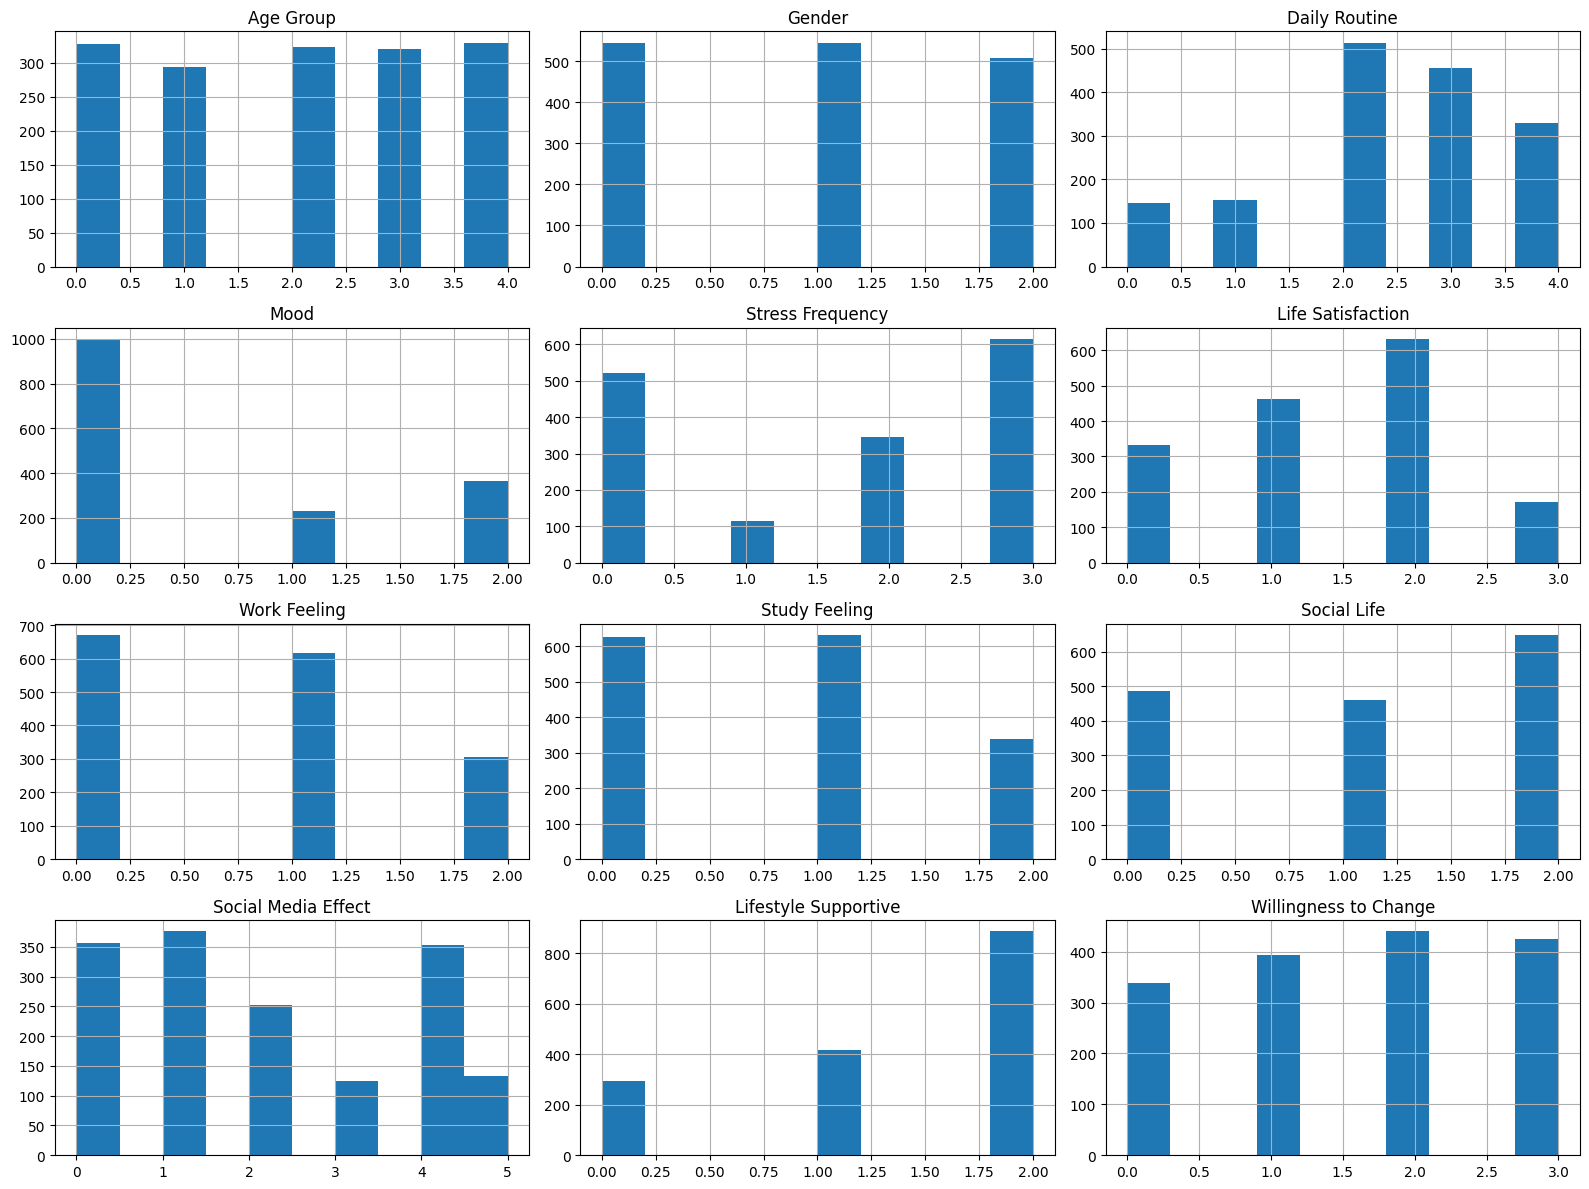

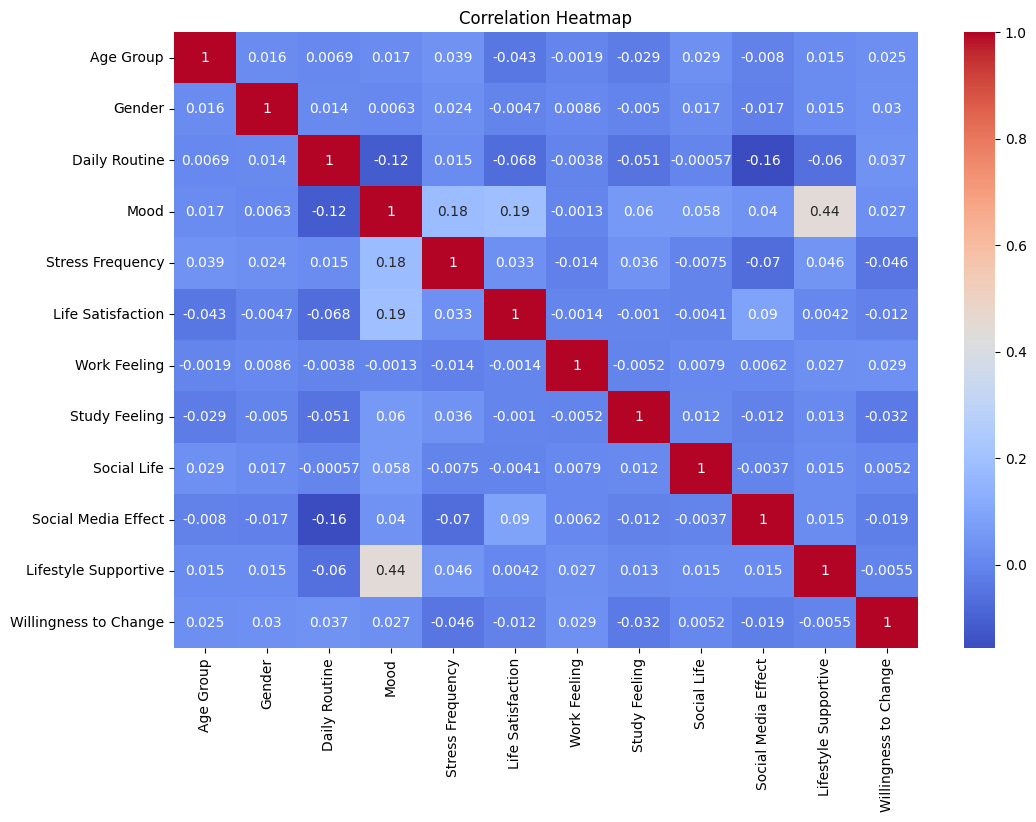

In [7]:
# Distribution of each column
df.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Separate features and target
X = df.drop('Mood', axis=1)
y = df['Mood']


## Random Forest Classifier 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       207
           1       0.70      0.77      0.73        39
           2       0.93      0.88      0.90        74

    accuracy                           0.89       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.89      0.89      0.89       320



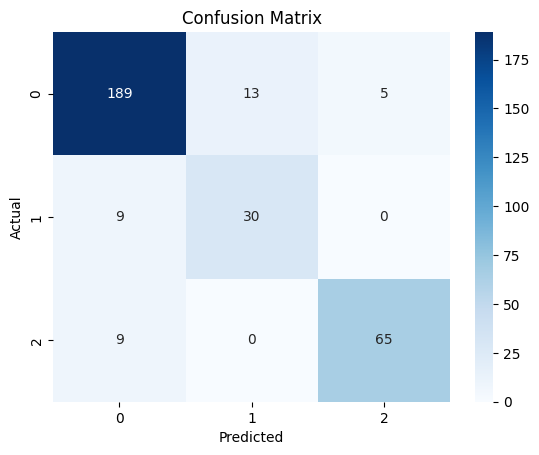

In [12]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Your DataFrame should already be loaded as `df`
# Updated column names based on your dataset
categorical_cols = [
    'Age Group', 'Gender', 'Daily Routine', 'Stress Frequency',
    'Life Satisfaction', 'Work Feeling', 'Study Feeling',
    'Social Life', 'Social Media Effect', 'Lifestyle Supportive',
    'Willingness to Change'
]

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame with the encoded column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Optional: Reset index to avoid mismatch if you want to concatenate
encoded_df.index = df.index

# Drop original categorical columns and join encoded data
df_encoded = df.drop(columns=categorical_cols).join(encoded_df)

# Show the processed DataFrame
print(df_encoded.head())


       Mood  Age Group_18-25  Age Group_26-35  Age Group_36-50  Age Group_50+  \
0   Neutral              0.0              0.0              1.0            0.0   
1  Negative              0.0              0.0              1.0            0.0   
2  Positive              1.0              0.0              0.0            0.0   
3  Negative              1.0              0.0              0.0            0.0   
4  Positive              0.0              0.0              0.0            1.0   

   Age Group_Under 18  Gender_Female  Gender_Male  Gender_Other  \
0                 0.0            0.0          0.0           1.0   
1                 0.0            1.0          0.0           0.0   
2                 0.0            1.0          0.0           0.0   
3                 0.0            0.0          1.0           0.0   
4                 0.0            1.0          0.0           0.0   

   Daily Routine_Chaotic  ...  Social Media Effect_Overwhelmed  \
0                    0.0  ...               

Encode the Target Variable (Mood)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['Mood'] = label_encoder.fit_transform(df['Mood'])


Split the Data (Train/Test)

In [23]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Mood'])
y = df_encoded['Mood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Your Model

In [24]:
import xgboost as xgb

# Create and train the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Important to avoid warnings
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

 Save Model and Encoders

In [25]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Save one-hot encoder
with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


## XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       250
           1       0.81      0.72      0.76        58
           2       0.93      0.97      0.95        91

    accuracy                           0.91       399
   macro avg       0.89      0.87      0.88       399
weighted avg       0.91      0.91      0.91       399



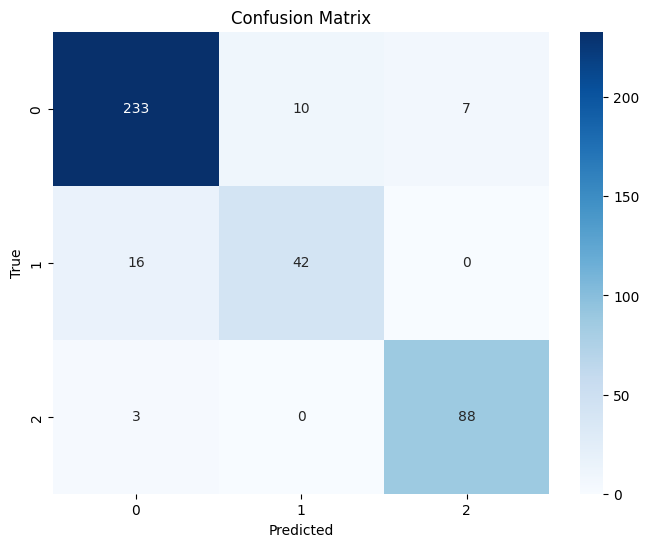

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Feature-target split (make sure 'mood' is your target column)
X = df.drop('Mood', axis=1)
y = df['Mood']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 👉 5. Save the model and scaler (ADD HERE)
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## K-Means Clustering

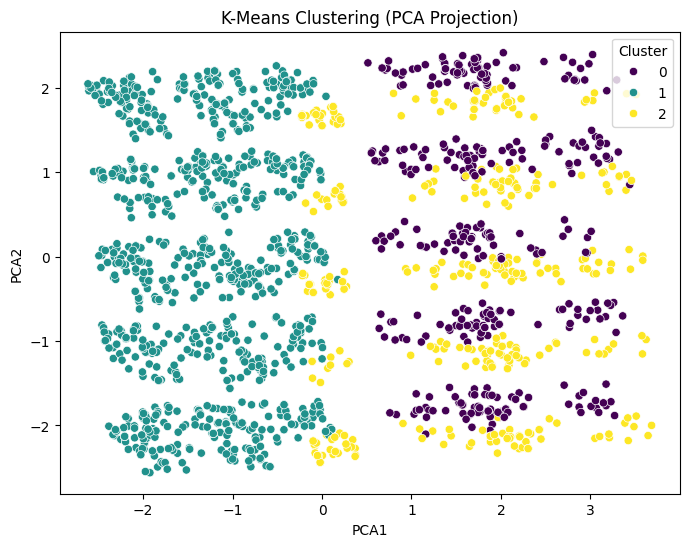

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel('balanced_diverse_wellbeing_dataset.xlsx', sheet_name='Sheet1')

# Drop the target column ('Mood') since clustering is unsupervised
X = df.drop(columns=['Mood'])

# Encode all categorical columns
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Optional: Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()


## MLP

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_excel('balanced_diverse_wellbeing_dataset.xlsx', sheet_name='Sheet1')

# Separate features and target
X = df.drop(columns=['Mood'])
y = df['Mood']

# Encode categorical features using OneHot
X_encoded = pd.get_dummies(X)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Define and train the MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.71      0.70       197
     Neutral       0.55      0.61      0.57        76
    Positive       0.83      0.76      0.80       127

    accuracy                           0.70       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.71      0.70      0.71       400



Confusion Matrix:
 [[139  38  20]
 [ 30  46   0]
 [ 30   0  97]]


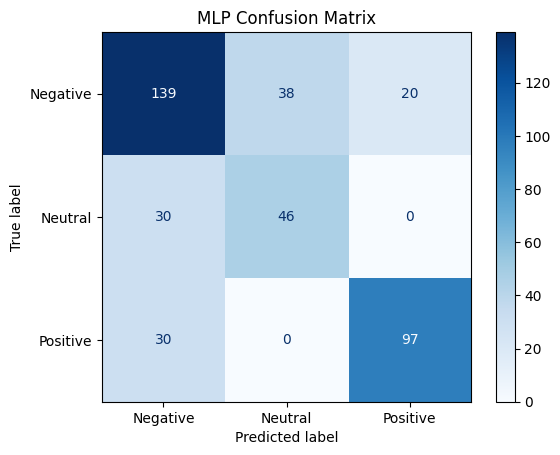

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix (raw)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("MLP Confusion Matrix")
plt.show()


## t-SNE Projection 

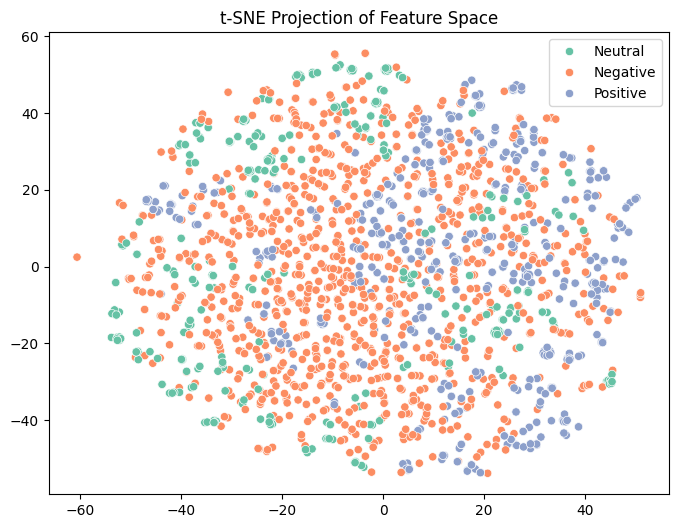

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_vis = tsne.fit_transform(X_encoded)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=le.inverse_transform(y_encoded), palette='Set2')
plt.title("t-SNE Projection of Feature Space")
plt.show()
